## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data)
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#drop_duplicates = combined_data.drop_duplicates(subset='Mouse ID',keep=False,inplace=True)
drop_duplicates = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#clean_metadata = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_duplicates)==False]
#clean_study = study_results[study_results['Mouse ID'].isin(drop_duplicates)==False]

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data["Mouse ID"].isin(drop_duplicates) == False]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_clean = len(clean_combined_data["Mouse ID"].unique())
print(f"In this experiment, the number of mice used is {number_of_clean}.")

In this experiment, the number of mice used is 248.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_combined_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# Statistics
mean = summary_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summary_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = summary_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev = summary_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summary_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats = pd.DataFrame({"Mean Tumor Volume (mm3)":mean,"Mean Tumor Volume (mm3)":median,"Variance":variance, "Std Deviation": std_dev, "SEM": sem}).round(2)
summary_stats

,Mean Tumor Volume (mm3),Variance,Std Deviation,SEM
Drug Regimen,,,,
Capomulin,41.56,24.95,4.99,0.33
Ceftamin,51.78,39.29,6.27,0.47
Infubinol,51.82,43.13,6.57,0.49
Ketapril,53.70,68.55,8.28,0.60
Naftisol,52.51,66.17,8.13,0.60
Placebo,52.29,61.17,7.82,0.58
Propriva,50.45,43.85,6.62,0.54
Ramicane,40.67,23.49,4.85,0.32
Stelasyn,52.43,59.45,7.71,0.57


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [7]:
import numpy as np

## Bar and Pie Charts

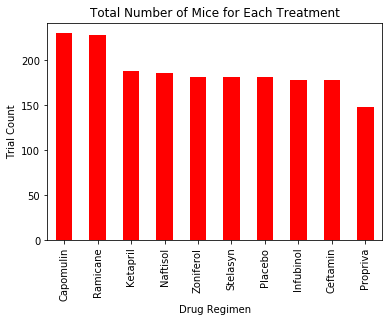

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_count = clean_combined_data["Drug Regimen"].value_counts()

x_axis = treatment_count.index
y_axis = treatment_count.values
treatment_count.plot(kind="bar", facecolor='red',)

# Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")
plt.title("Total Number of Mice for Each Treatment")
plt.xticks(rotation=90)
plt.show()


In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_drugs = treatment_count.index
y_axis = treatment_count.values
x_axis = np.arange(0,len(y_axis),1)
                 
plt.bar(x_drugs, y_axis, color='g', alpha=0.5, width= 0.5, align= "center")

plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")
plt.title("Total Number of Mice for Each Treatment")
plt.xticks(rotation=90)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_combined_data.groupby(["Mouse ID","Sex"])
groupby_gender

gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Gender %"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Gender %"] = mouse_gender["Gender %"]

#gender_df
mouse_gender


,Total Count,Gender %
Sex,,
Female,123,49.596774
Male,125,50.403226


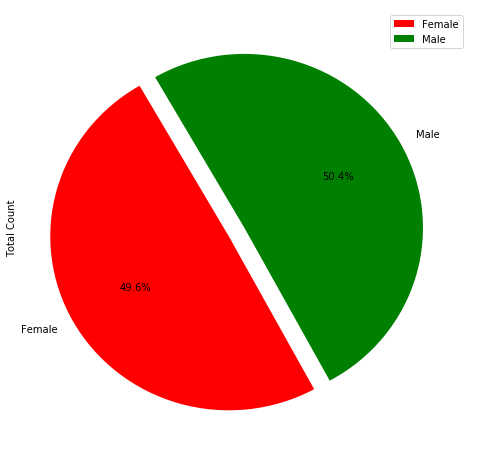

In [26]:
colors = ['red', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', startangle = 120, explode = explode, figsize=(8,8), colors = colors, autopct="%1.1f%%")
plt.show()

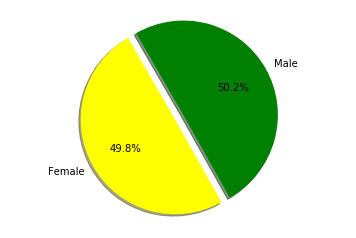

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels from mouse_gender
genders = ["Female","Male"]

#Values of the %
percentage = [49.799197,50.200803]

#Settings for the pie chart
colors = ['yellow', 'green']
explode = (0.1, 0)

#Create pie chart 
plt.pie(percentage, explode=explode, labels=genders, startangle=120, colors=colors, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_regimes = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse

top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [35]:
# Put treatments into a list for for loop (and later for plot labels)

top_regimens_sort = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_df = top_regimens_sort.to_frame()
top_regimens_df
# Create empty list to fill with tumor vol data (for plotting)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_df = top_regimens_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

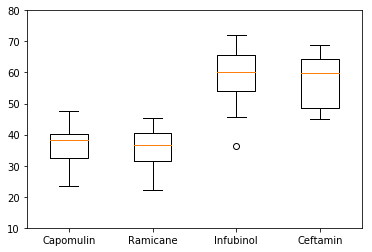

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

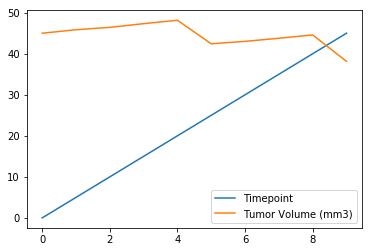

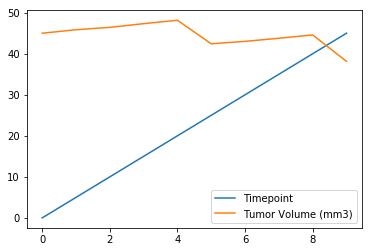

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_against_tumor = combined_data[combined_data["Mouse ID"].isin(["j119"])]
time_against_tumor_data = time_against_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_against_tumor_data

line_plot_df = time_against_tumor_data.reset_index()
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()
plt.show()

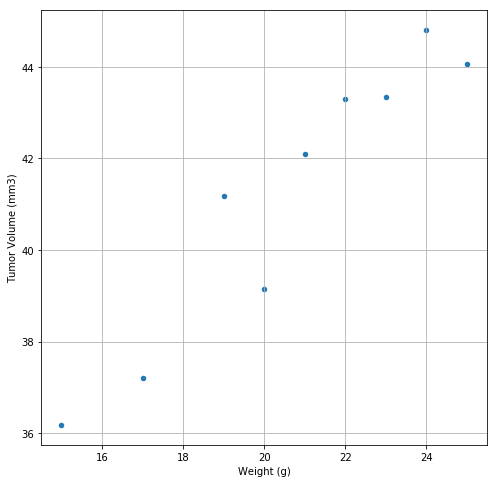

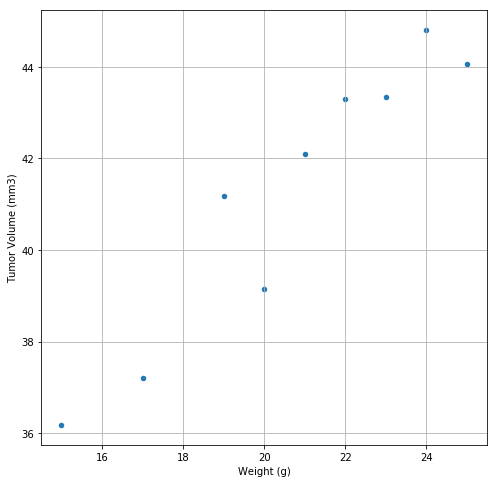

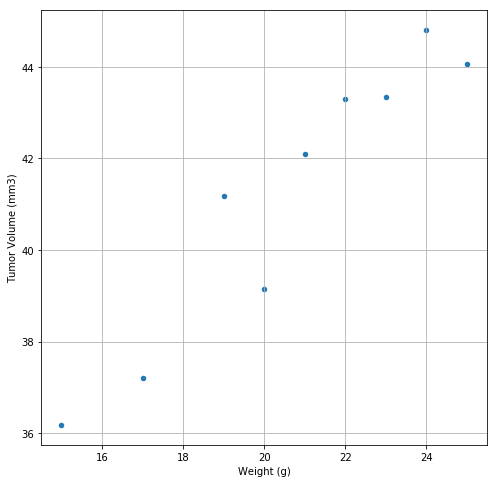

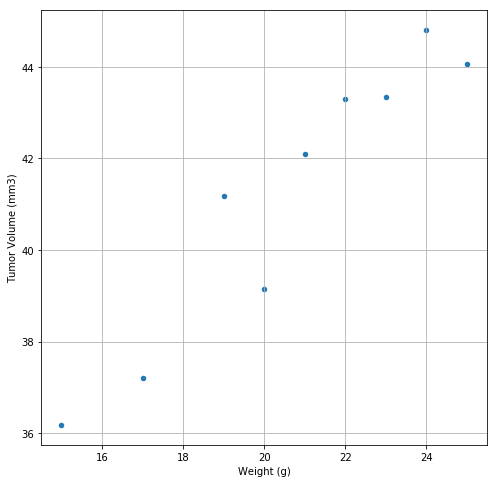

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get Capomulin from merged data
capomulin_scatter = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = top_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)
capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [45]:
from scipy.stats import linregress

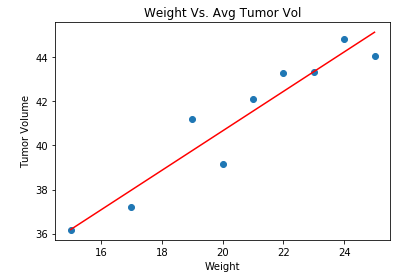

In [47]:
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()